# **To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid** 

#1.) **Research Question**

#a.) **Defining the question**

- Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. I have been tasked to Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, I should build a model that makes the above prediction. I should not use individual decision trees, rather I should use at least 2 out of the 3 advanced models I have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- I should Try and optimize each of the 2 models, making sure to document how I've set up my hyperparameters.
- Identify which of the 2 models I trust most, and use my model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, I don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, I may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation I've done on the data.

- Apply Polynomial, linear and rbf kernel function to build my SVM model and then evaluate their performance and pick the kernel that performs the best.Ishould remember to tune my parameters to improve the performance of my model. To make my life easier, make sure to visualize the models I've created. Use any two features to build the models for this step.

Hint: I may want to use decision trees to give me the most preferable features I can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use that kernel together with my tuned parameters and repeat the prediction but this time using additional features. Compare the model I've just created with the 2-features version

#b.) **Understanding the context**
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.

Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

#c.) **Defining metric for success**


Develop a suitable model to predict hypothyrodism cases with an accuracy of atleast 90% which is acceptable as hypothyroidism mortality rate is 50% in comorbidity cases.


#d.)**Recording the experimental design**

Several experimental designs will be used i.e.:

a.Exploratory data analysis

b.Decison trees for classification analysis with several models

## **2.) Dataset Loading and Preview**




### **Importing Libraries**

In [ ]:
#Reading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#plotting libraries
import seaborn as sns
from sklearn.tree import export_graphviz,plot_tree
import graphviz

# Decision trees libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
# Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import cross_val_score


**Loading the Dataset**

In [ ]:
#load the datasets
hypothyroidism_df=pd.read_csv('//content/hypothyroid.csv')

## **3.) Checking the Data**

In [ ]:
# Preview the top of the dataset
hypothyroidism_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Preview the bottom of the dataset
hypothyroidism_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Checking for the shape of the dataframe
print('The dataset has'+ str (hypothyroidism_df.columns.shape)+'columns and' +str (hypothyroidism_df.index.shape) +'rows')

The dataset has(26,)columns and(3163,)rows


In [ ]:
#Checking for data types
hypothyroidism_df.dtypes
#It appears that the dataframe has got only numerical data.

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

- Not every column has the right datatype for its individual column.

In [ ]:
# Printing the unique values
columns = hypothyroidism_df.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(hypothyroidism_df[i].unique())
  print('                                                                           ')
  print('***************************************************************************')

Unique values in status are :
['hypothyroid' 'negative']
                                                                           
***************************************************************************
Unique values in age are :
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
                                                                           
***************************************************************************
Unique values in sex are :
['M' 'F' '?']
                                                                           
******************************

In [ ]:
#Viewing the column names in the dataframe
hypothyroidism_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Checking the summary statistics of the dataset
hypothyroidism_df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


## **4.) External Data Source Validation**

4.1.) Validation

- The dataset we have is a reflection of the data collected focusing on Thyroid patients and it can be used to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. As validated from the source our dataset has the following attributes.

**Dataset Columns**

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

## **5.) Tidying the Dataset**

In [ ]:
# Previewing the dataset
hypothyroidism_df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?


In [ ]:
hypothyroidism_df.columns


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

**Missing Values**

In [ ]:
#Checking for missing values
hypothyroidism_df.isnull().any()
#There are none missing values
hypothyroidism_df.isnull().sum()


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

- There are no missing values this is because of the presence of the '?'

In [ ]:
# Replacing the '?' value with NaN for missing values
hypothyroidism_df.replace(to_replace='?', inplace=True, value=np.NaN)

# Checking for the number of missing values now
hypothyroidism_df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
# Converting the column datatypes to their respective datatypes

cat_cols = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


num_cols = ['age','TSH','T3', 'TT4', 'T4U', 'FTI', 'TBG']

# for loop for converting columns to the right data types
for column in hypothyroidism_df.columns:
  if column in num_cols:
    hypothyroidism_df[column] = hypothyroidism_df[column].astype('float')
  elif column in cat_cols:
    hypothyroidism_df[column] = hypothyroidism_df[column].astype('category')

# Confirming if we have the correct datatypes
hypothyroidism_df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
# Replacing our missing values with mean
miss_col = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in miss_col:
  hypothyroidism_df[col].fillna(hypothyroidism_df[col].mean(), inplace = True)

# Replacing for the sex column with mode because it is a categorical data
hypothyroidism_df['sex'].fillna(hypothyroidism_df['sex'].mode(), inplace = True)

# Drop the TBG_measured and TBG because almost all their records are null
hypothyroidism_df.drop(['TBG','TBG_measured'], axis=1, inplace=True)


# Confirming all the null values ahve been replaced
hypothyroidism_df.isna().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
dtype: int64

In [ ]:
# We still have some missing values in the sex column therefore we need to go with filling the 
# missing values with 'F' because it the mode value
hypothyroidism_df['sex'].fillna('F', inplace = True)

In [ ]:
# Checking if all the missingvalues were replaced
hypothyroidism_df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

- The missing values have been dealt with

In [ ]:
hypothyroidism_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

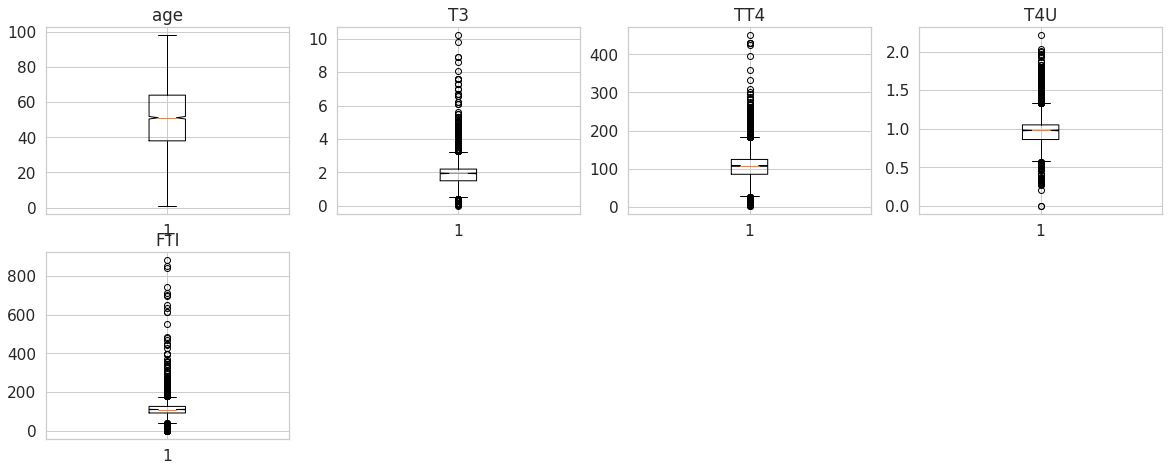

In [ ]:
# checking for outliers

cols_dict = {'age': 1, 'T3': 2, 'TT4': 3, 'T4U': 4, 'FTI': 5}

plt.figure(figsize=(20,20))

# make a boxplot for each numerical column
for variable,i in cols_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(hypothyroidism_df[variable], 'red')
  plt.title(variable)

plt.show()

- There are no Existing outliers

**Duplicated Values**

In [ ]:
#checking if the dataset has duplicated values. If present, duplicates will be dropped
hypothyroidism_df.duplicated().sum()

156

In [ ]:
# Identify duplicate data and drop it

hypothyroidism_df = hypothyroidism_df.drop_duplicates()

# check the shape of the data to see if there were any duplicates
hypothyroidism_df.shape

(3007, 24)

**Modifying columns names**

In [ ]:
#Tyding up the column names
hypothyroidism_df.columns = hypothyroidism_df.columns.str.strip().str.upper().str.replace(' ', '_')

In [ ]:
#checking column names
hypothyroidism_df.columns

Index(['STATUS', 'AGE', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'TSH', 'T3_MEASURED', 'T3', 'TT4_MEASURED', 'TT4',
       'T4U_MEASURED', 'T4U', 'FTI_MEASURED', 'FTI'],
      dtype='object')

In [ ]:
#Checkig the shape
hypothyroidism_df.shape

(3007, 24)

##**6.) Exploratory Data Analysis**

### **Univariate Analysis**

In [ ]:
#Descibing the columns
hypothyroidism_df['SEX'].mode()

0    F
Name: SEX, dtype: category
Categories (2, object): ['F', 'M']

In [ ]:
#Checking the mean for the column age
hypothyroidism_df['AGE'].mean()

51.3500302753277

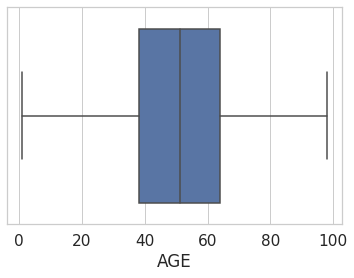

In [ ]:
# Visualizing the age column in a box plot to best understand its distriution
ax=sns.boxplot(x=hypothyroidism_df['AGE'])

<Figure size 1000x300 with 0 Axes>

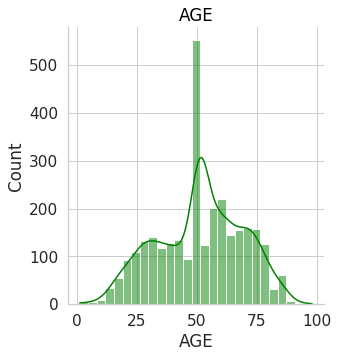

<Figure size 1000x300 with 0 Axes>

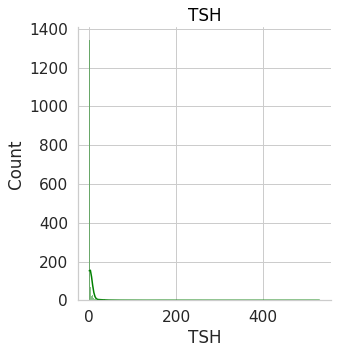

<Figure size 1000x300 with 0 Axes>

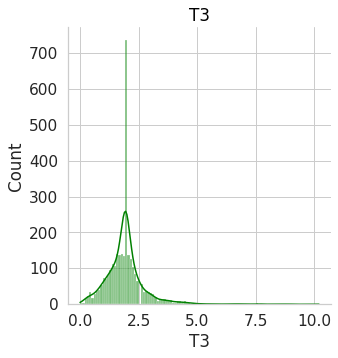

<Figure size 1000x300 with 0 Axes>

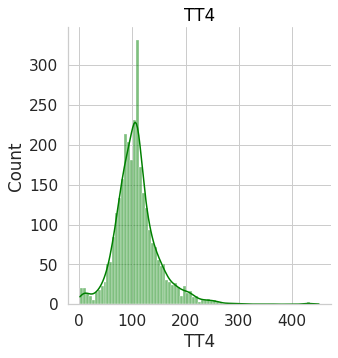

<Figure size 1000x300 with 0 Axes>

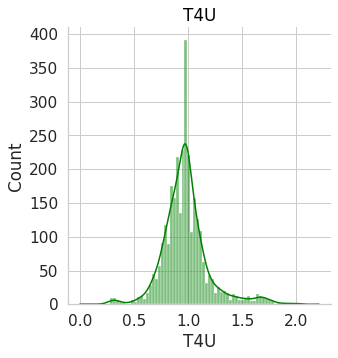

<Figure size 1000x300 with 0 Axes>

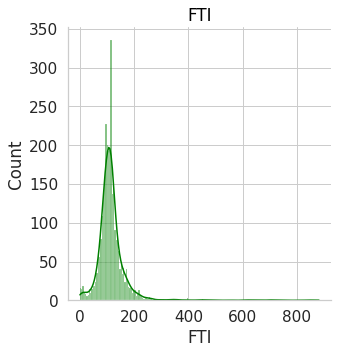

In [ ]:
# Plotting the individual histograms
#
col = ["AGE", "TSH", "T3", "TT4", "T4U", "FTI"]
for i in col:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(hypothyroidism_df[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

In [ ]:
def pie(df,column):
  data=df[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  pie=data.plot.pie(autopct='%.1f%%',labels=(df[column].unique()),startangle=0)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.show()
  return plt.show()

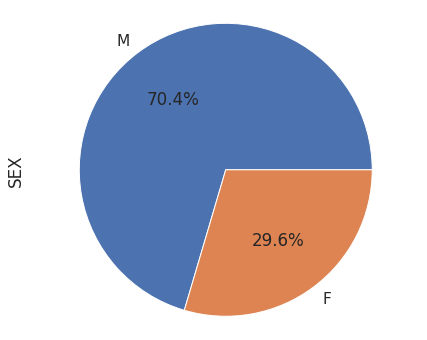

In [ ]:
pie(hypothyroidism_df,'SEX')

67.8% of the respondents were male while 32.2% were women

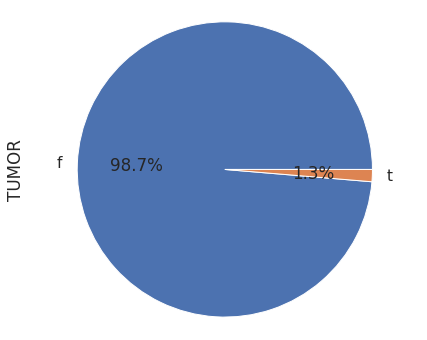

In [ ]:
pie(hypothyroidism_df,'TUMOR')

98.7% respondents hsd no tumor

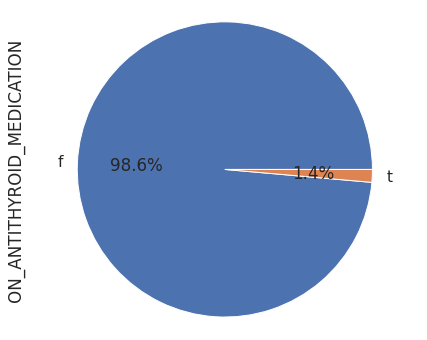

In [ ]:
pie(hypothyroidism_df,'ON_ANTITHYROID_MEDICATION')

98.6% respondents were not on antithyroid medication

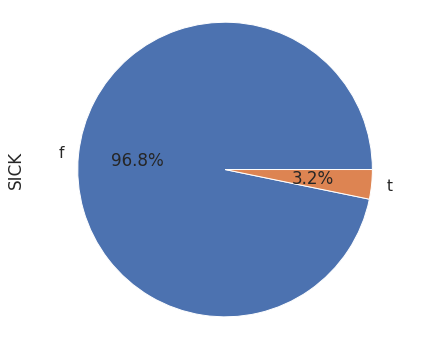

In [ ]:
pie(hypothyroidism_df,'SICK')

only 4.1% of the respondents were sick at the time

In [ ]:
hypothyroidism_df.columns

Index(['STATUS', 'AGE', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'TSH', 'T3_MEASURED', 'T3', 'TT4_MEASURED', 'TT4',
       'T4U_MEASURED', 'T4U', 'FTI_MEASURED', 'FTI'],
      dtype='object')

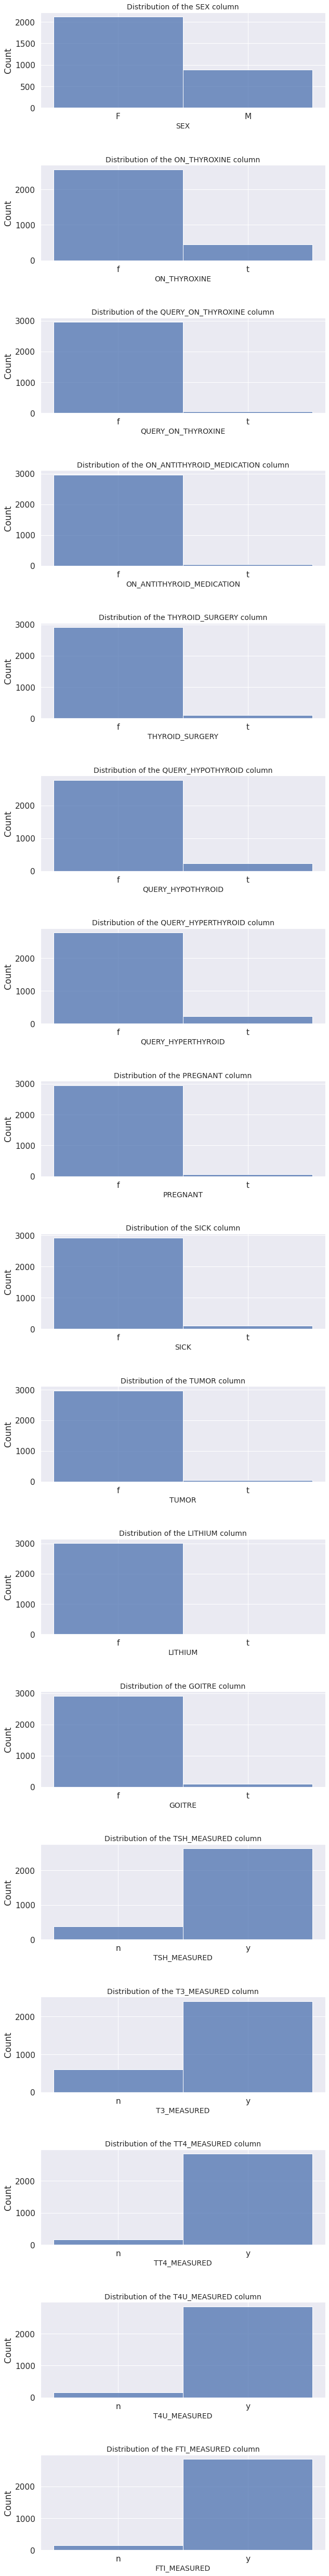

In [ ]:
# Creating a distributions for the 0,1 columns
# ---

col_names = ['SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'T3_MEASURED','TT4_MEASURED','T4U_MEASURED','FTI_MEASURED']

fig, ax = plt.subplots(len(col_names), figsize = (10,70))
for i, col_val in enumerate(col_names):

    sns.histplot(x = hypothyroidism_df[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

### **Bivariate Analysis**

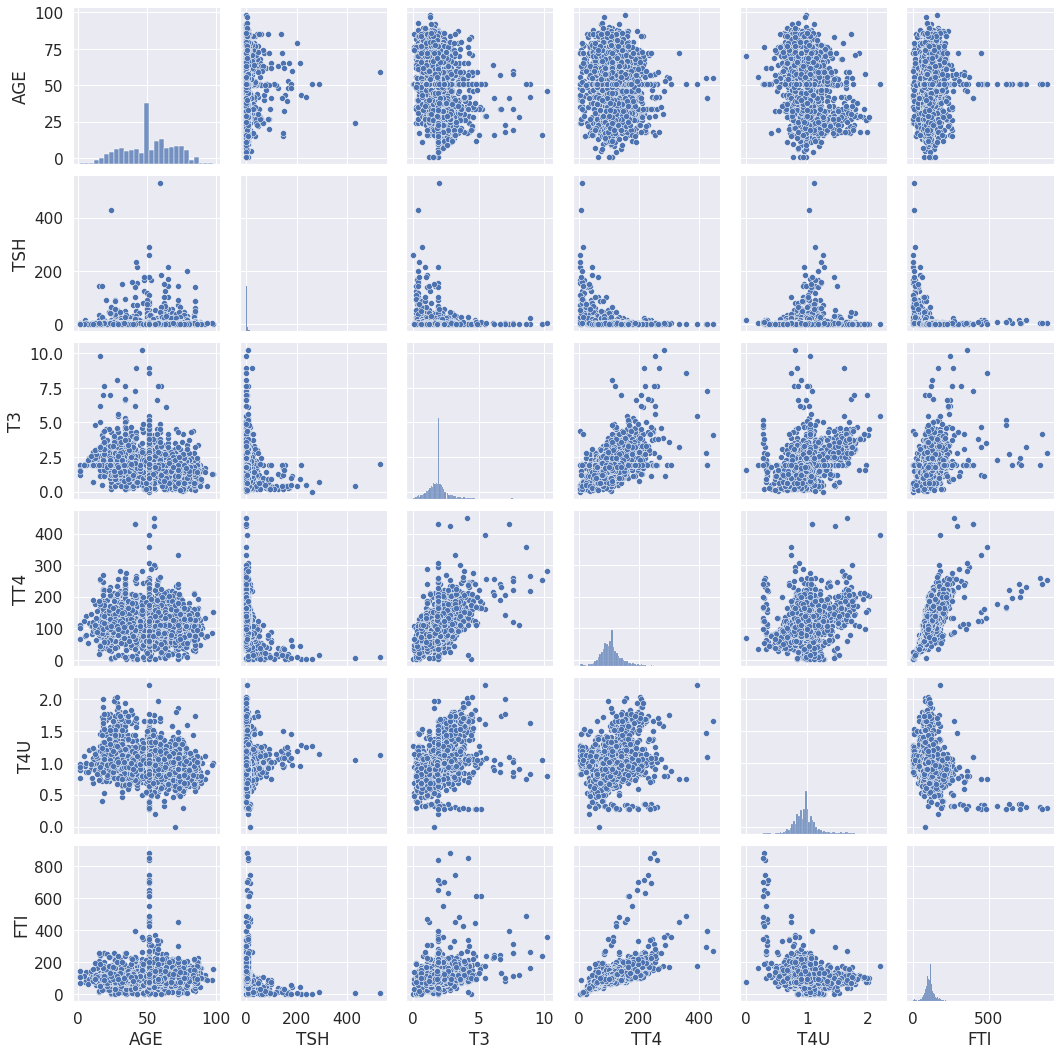

In [ ]:
# Plotting pairplots

sns.pairplot(hypothyroidism_df)
plt.show()

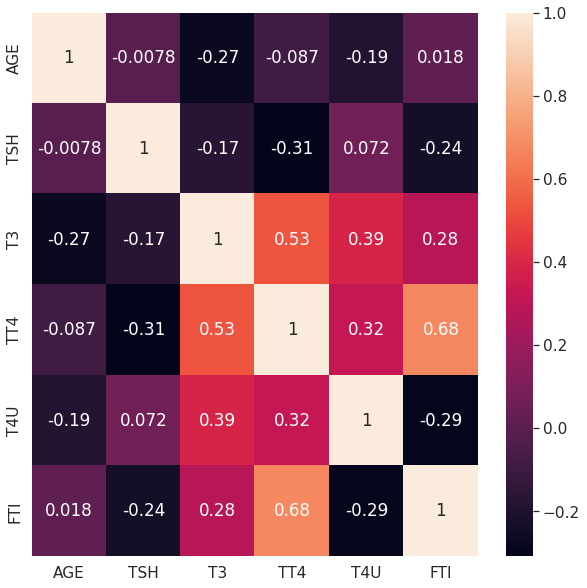

In [ ]:
# Plotting a correlation matrix

plt.subplots(figsize=(10,10))
sns.heatmap(hypothyroidism_df.corr(), annot=True)
plt.show()

### **Multivariate Analysis**

In [ ]:
# We could use the LDA method to assess the predictor and the dependent variables
# import LDA method from sklearn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Then the following code divides data into training and test sets
#(THE DIVISION OF THE PRECTICTOR AND DEPENDENT VARIABLE HAPPENS BELOW, SO RUN THIS
# CELL AFTER RUNNING THE DECISON TREES CELL WHERE THE SPLIT AND ENCODING OCCURS) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 25  10]
 [ 10 858]]
Accuracy0.9778516057585825


## **7.)Implementing the Solution**



### **a.)Decision Trees: Optimized**

### **Data Preparation**

**Label encoding**

In [ ]:
hypothyroidism_df.head(3)

,STATUS,AGE,SEX,ON_THYROXINE,QUERY_ON_THYROXINE,ON_ANTITHYROID_MEDICATION,THYROID_SURGERY,QUERY_HYPOTHYROID,QUERY_HYPERTHYROID,PREGNANT,...,TSH_MEASURED,TSH,T3_MEASURED,T3,TT4_MEASURED,TT4,T4U_MEASURED,T4U,FTI_MEASURED,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0


In [ ]:
#Convertig the categorical values to binary observations
column=['STATUS', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'T3_MEASURED', 'TT4_MEASURED',
       'T4U_MEASURED', 'FTI_MEASURED']
for i in column:
  hypothyroidism_df[i]=hypothyroidism_df[i].astype('category')
  hypothyroidism_df[i] = hypothyroidism_df[i].cat.codes
  

In [ ]:
#Lets preview 10 rows from the converted dataset
hypothyroidism_df.head(10)

,STATUS,AGE,SEX,ON_THYROXINE,QUERY_ON_THYROXINE,ON_ANTITHYROID_MEDICATION,THYROID_SURGERY,QUERY_HYPOTHYROID,QUERY_HYPERTHYROID,PREGNANT,...,TSH_MEASURED,TSH,T3_MEASURED,T3,TT4_MEASURED,TT4,T4U_MEASURED,T4U,FTI_MEASURED,FTI
0,0,72.0,1,0,0,0,0,0,0,0,...,1,30.0,1,0.600000,1,15.0,1,1.48,1,10.0
1,0,15.0,0,1,0,0,0,0,0,0,...,1,145.0,1,1.700000,1,19.0,1,1.13,1,17.0
2,0,24.0,1,0,0,0,0,0,0,0,...,1,0.0,1,0.200000,1,4.0,1,1.00,1,0.0
3,0,24.0,0,0,0,0,0,0,0,0,...,1,430.0,1,0.400000,1,6.0,1,1.04,1,6.0
4,0,77.0,1,0,0,0,0,0,0,0,...,1,7.3,1,1.200000,1,57.0,1,1.28,1,44.0
5,0,85.0,0,0,0,0,0,1,0,0,...,1,138.0,1,1.100000,1,27.0,1,1.19,1,23.0
6,0,64.0,0,0,0,0,1,0,0,0,...,1,7.7,1,1.300000,1,54.0,1,0.86,1,63.0
7,0,72.0,0,0,0,0,0,0,0,0,...,1,21.0,1,1.900000,1,34.0,1,1.05,1,32.0
8,0,20.0,0,0,0,0,0,1,0,0,...,1,92.0,0,1.939749,1,39.0,1,1.21,1,32.0
9,0,42.0,0,0,0,0,0,0,0,0,...,1,48.0,0,1.939749,1,7.6,1,1.02,1,7.5


In [ ]:
# Splitting the variables as defined
features=['AGE', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'TSH', 'T3_MEASURED', 'T3', 'TT4_MEASURED', 'TT4',
       'T4U_MEASURED', 'T4U', 'FTI_MEASURED', 'FTI']
Class=['Has Hypothyroid','Has no Hypothyroid']
X=hypothyroidism_df[features].values
y=hypothyroidism_df['STATUS']

In [ ]:
# Dividing our data into training and test sets usindg 80% of our dataset to train the model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **Decision Forest: Baseline**

In [ ]:
# Specifying use of the decision tree model and accessing its accuracy
dectree=DecisionTreeClassifier(criterion='entropy')

# Training the Algorithm
dectree.fit(X_train,y_train)

# Making Predictions
y_pred=dectree.predict(X_test)

# Evaluating the Algorithm
accuracy=metrics.accuracy_score(y_test,y_pred)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 99.16943521594685 %


                           Importance
AGE                          0.019376
SEX                          0.000000
ON_THYROXINE                 0.011947
QUERY_ON_THYROXINE           0.000000
ON_ANTITHYROID_MEDICATION    0.011621
THYROID_SURGERY              0.007918
QUERY_HYPOTHYROID            0.013942
QUERY_HYPERTHYROID           0.000000
PREGNANT                     0.000000
SICK                         0.000000
TUMOR                        0.000000
LITHIUM                      0.000000
GOITRE                       0.000000
TSH_MEASURED                 0.000000
TSH                          0.189245
T3_MEASURED                  0.000000
T3                           0.028807
TT4_MEASURED                 0.000000
TT4                          0.020857
T4U_MEASURED                 0.000000
T4U                          0.008753
FTI_MEASURED                 0.000000
FTI                          0.687534


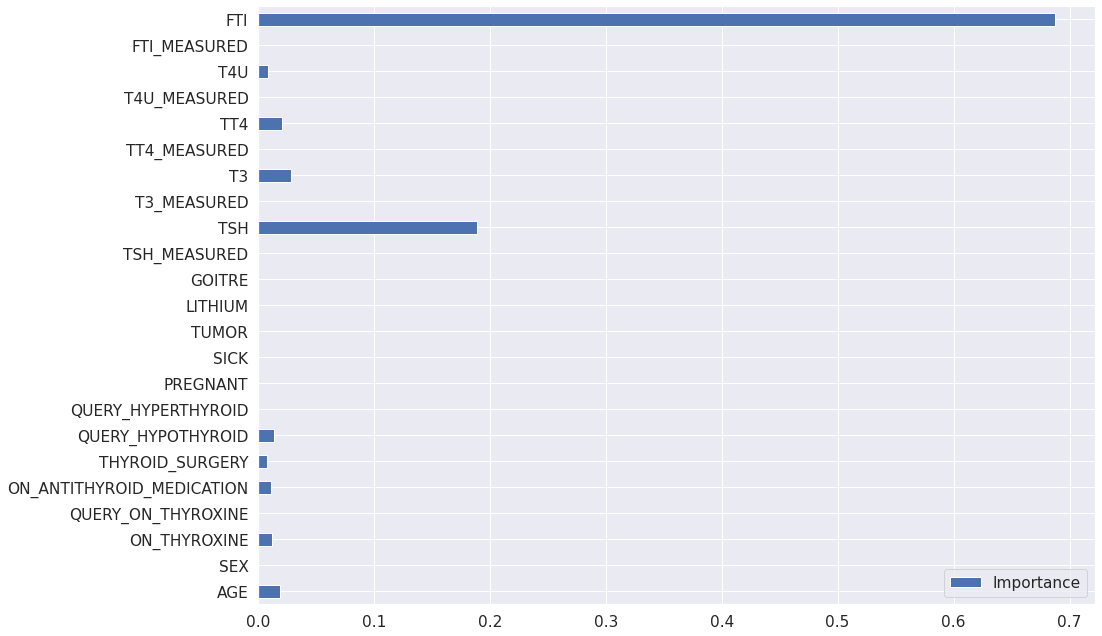

In [ ]:
# Assessing columns significance
feature=hypothyroidism_df[features]
dfimportance0=pd.DataFrame(dectree.feature_importances_,feature.columns,columns=['Importance'])
dfimportance0.plot(kind='barh',figsize=(15,11))
print(dfimportance0)

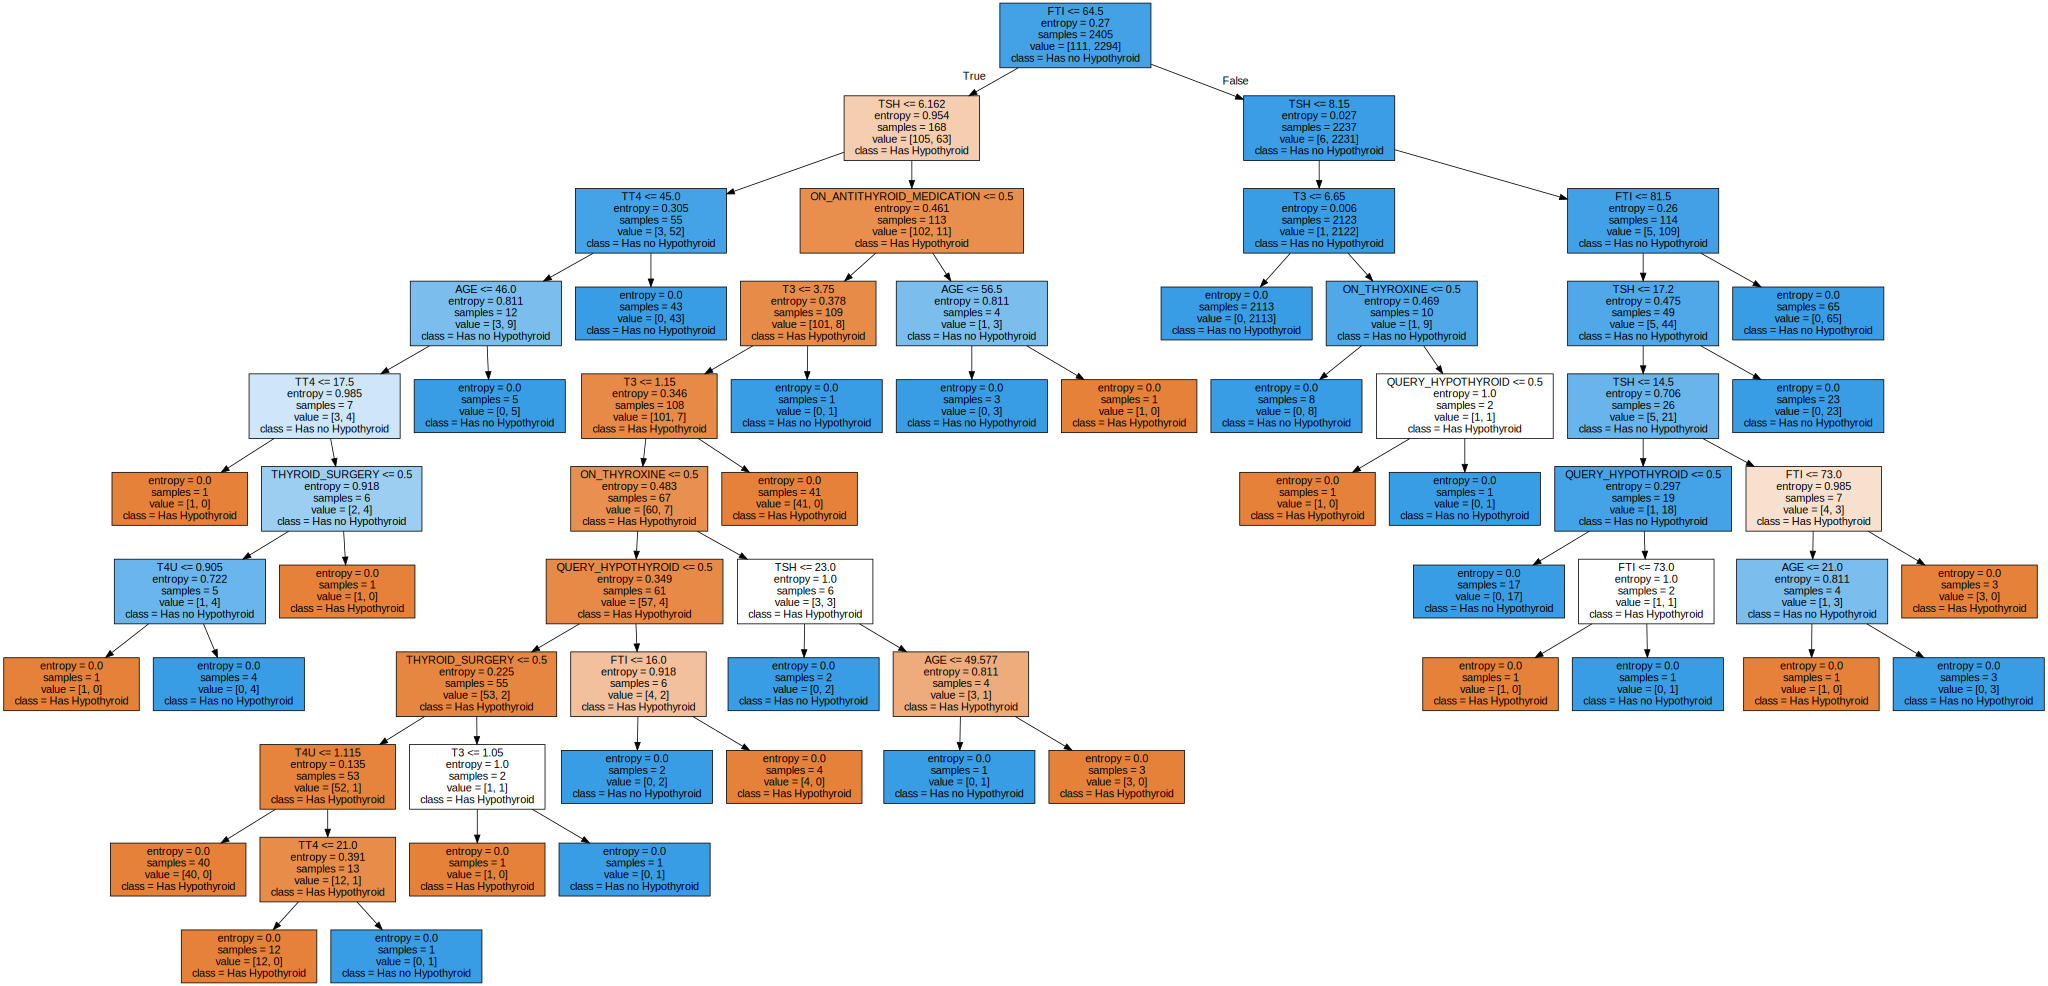

In [ ]:
graph=export_graphviz(dectree,feature_names=features,class_names=Class,filled=True)
graph1=graphviz.Source(graph,format='png')
graph1

### **b.) Random Forest**

In [ ]:
# Train the Random Forest model 
rtree=RandomForestClassifier(n_estimators=300)
rtree.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred1=rtree.predict(X_test)

#Assess the accuracy of the model
accuracy1=metrics.accuracy_score(y_test,y_pred1)
print('The accuracy of the model is',str(accuracy1 *100),'%')

The accuracy of the model is 98.67109634551495 %


In [ ]:
# Predict based on the model we've trained

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
comparison_frame.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.950166,0.960133
std,0.217783,0.195810
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Here the model was built using 300 trees. No max depth or minimum sample splits were defined. the accuracy of the model is 98.67109634551495 %. Opmimization using this parameters i.e max depth and min sample splits will be used in order to assess whethere the model perfomance will improve

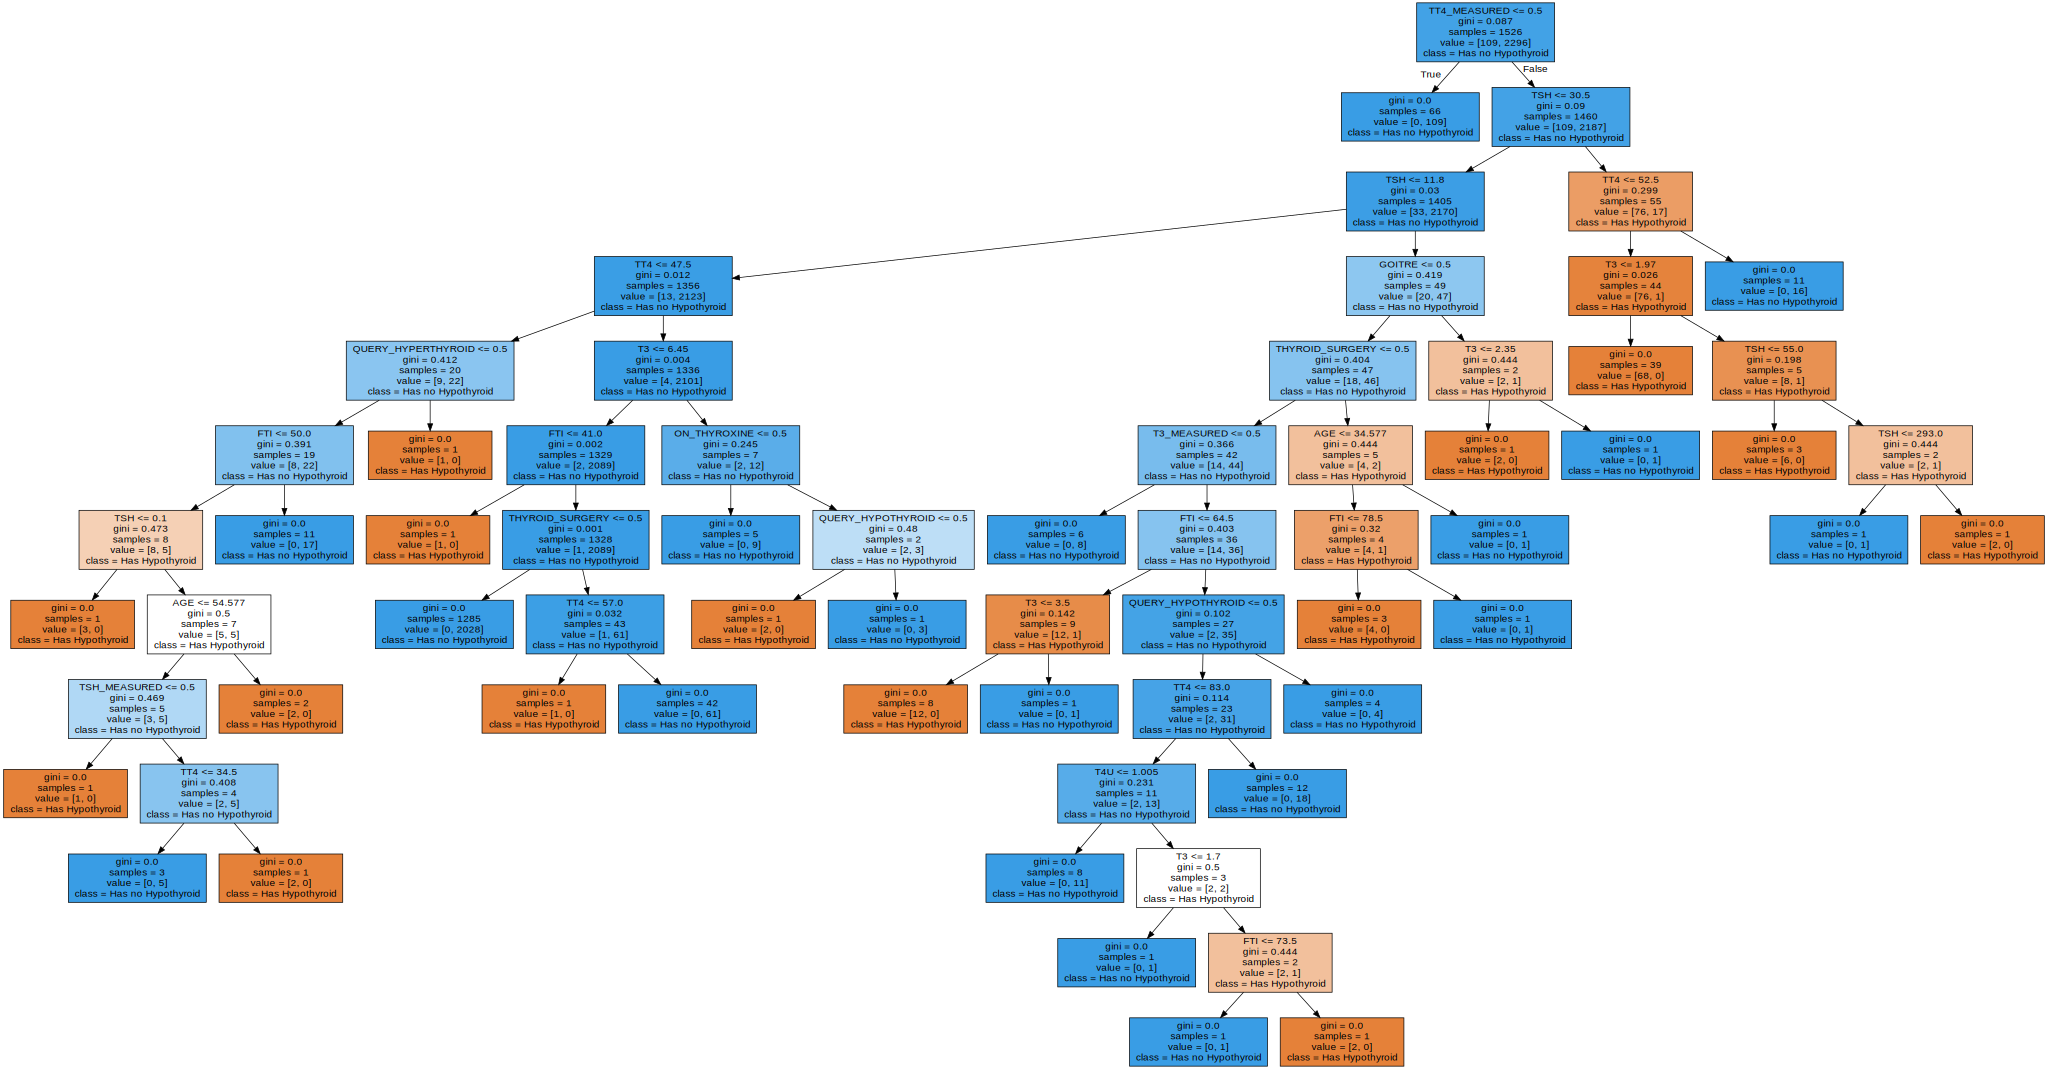

In [ ]:
# Visualizing the Random forest tree
view=rtree.estimators_[60]
graph=export_graphviz(view,feature_names=features,class_names=Class,filled=True)
graph1=graphviz.Source(graph,format='png')
graph1

Random Forest Optimized by introducing max_depth,minimum sample split and reduction of no of trees from the model

In [ ]:
rtree1=RandomForestClassifier(n_estimators=500, max_depth=8,min_samples_split=25)
#500 trees have been used in the forest,a max depth of 8 and minimum sapmle split of 25
rtree1.fit(X_train,y_train)
y_pred2=rtree1.predict(X_test)
accuracy2=metrics.accuracy_score(y_test,y_pred2)
print('The accuracy of the model is',str(accuracy2 *100),'%')

The accuracy of the model is 98.50498338870432 %


The accuracy of the model has decreased to 98.50 which still achieves the success metric set

                           Importance
AGE                          0.014320
SEX                          0.002082
ON_THYROXINE                 0.003012
QUERY_ON_THYROXINE           0.000124
ON_ANTITHYROID_MEDICATION    0.004601
THYROID_SURGERY              0.003936
QUERY_HYPOTHYROID            0.004597
QUERY_HYPERTHYROID           0.001059
PREGNANT                     0.000146
SICK                         0.002137
TUMOR                        0.000010
LITHIUM                      0.000014
GOITRE                       0.001444
TSH_MEASURED                 0.004563
TSH                          0.254251
T3_MEASURED                  0.001361
T3                           0.064412
TT4_MEASURED                 0.000127
TT4                          0.275352
T4U_MEASURED                 0.000092
T4U                          0.018233
FTI_MEASURED                 0.000076
FTI                          0.344050


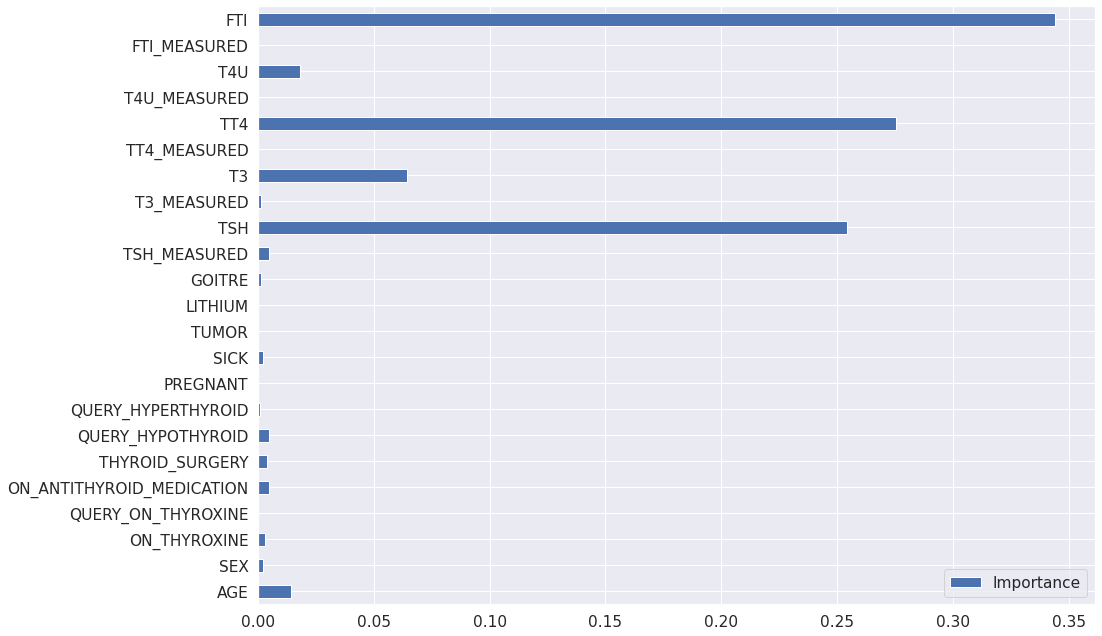

In [ ]:
# Assessing columns significance
feature=hypothyroidism_df[features]
dfimportance=pd.DataFrame(rtree1.feature_importances_,feature.columns,columns=['Importance'])
dfimportance.plot(kind='barh',figsize=(15,11))
print(dfimportance)



### **c.)Gradient boost**

In [ ]:
# Let's start with Gradient boosted classifier
# We use decision trees when performing gradient boosting 
# We will start by setting different learning rates and comparing the performance of the classifier 
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb_clf.score(X_train, y_train))
    print("Accuracy score (validation):", gb_clf.score(X_test, y_test))
    print("                                                                                    ")
    print("*********************************************************************************")


Learning rate:  0.05
Accuracy score (training): 0.9875259875259875
Accuracy score (validation): 0.9817275747508306
                                                                                    
*********************************************************************************
Learning rate:  0.075
Accuracy score (training): 0.9896049896049897
Accuracy score (validation): 0.9833887043189369
                                                                                    
*********************************************************************************
Learning rate:  0.1
Accuracy score (training): 0.9912681912681913
Accuracy score (validation): 0.9833887043189369
                                                                                    
*********************************************************************************
Learning rate:  0.25
Accuracy score (training): 0.9954261954261955
Accuracy score (validation): 0.9867109634551495
                                       

- We choose the learning rate with the highest accuracy it 0.25

In [ ]:
# Fit the model with our new hyperparameter
grboost=GradientBoostingClassifier(n_estimators=300,learning_rate=0.25)
grboost.fit(X_train,y_train)
y_predb=grboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracyb=metrics.accuracy_score(y_test,y_predb)
print('The accuracy of the model is',str(accuracyb *100),'%')

The accuracy of the model is 99.16943521594685 %


- The models accuracy compared to the decision tree improved.\ The parameters used (n_estimators, learning_rat, max_feature, max_depth, random_state) have been tweaked to give the maximum accuracy

                             Importance
AGE                        2.519607e-02
SEX                        7.637452e-04
ON_THYROXINE               7.863904e-03
QUERY_ON_THYROXINE         5.512920e-06
ON_ANTITHYROID_MEDICATION  2.234578e-02
THYROID_SURGERY            9.917569e-03
QUERY_HYPOTHYROID          1.594363e-02
QUERY_HYPERTHYROID         1.470866e-08
PREGNANT                   0.000000e+00
SICK                       2.276078e-07
TUMOR                      0.000000e+00
LITHIUM                    0.000000e+00
GOITRE                     1.936369e-04
TSH_MEASURED               2.907940e-03
TSH                        2.328316e-01
T3_MEASURED                4.169052e-06
T3                         2.083948e-02
TT4_MEASURED               0.000000e+00
TT4                        1.258601e-02
T4U_MEASURED               0.000000e+00
T4U                        5.960159e-03
FTI_MEASURED               0.000000e+00
FTI                        6.426405e-01


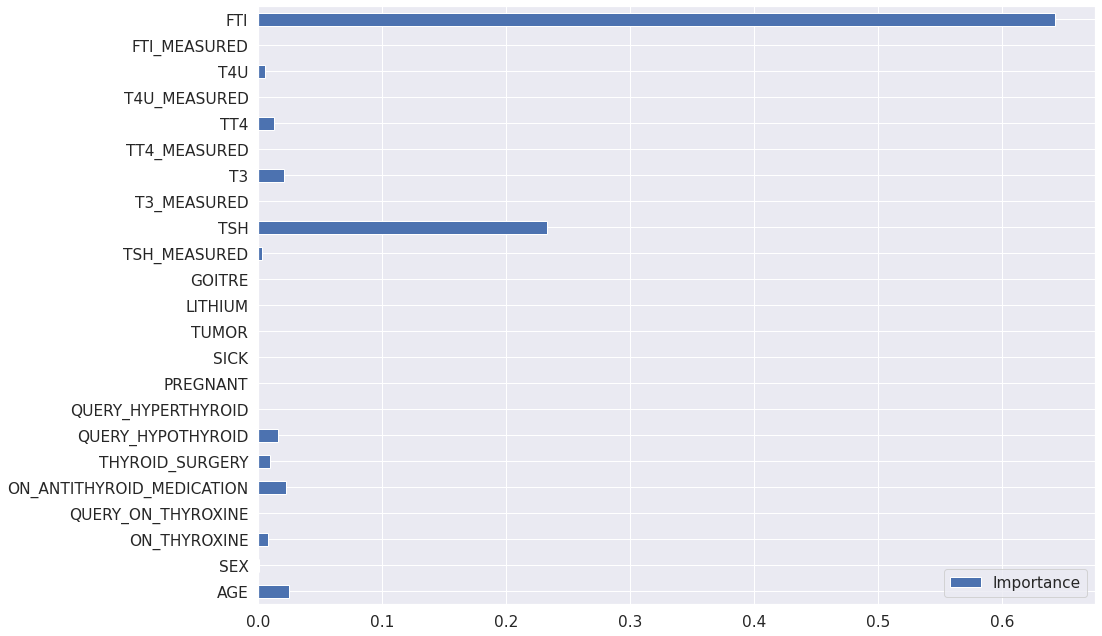

In [ ]:
dfimportanceb=pd.DataFrame(grboost.feature_importances_,feature.columns,columns=['Importance'])
dfimportanceb.plot(kind='barh',figsize=(15,11))
print(dfimportanceb)

**FTI** test results used to diagnose thyroid disorders is the most important feature used by the** gradient boost** to creat the model whilethe **random forest's** most important feature is **T4U** test results

### **d.) Support Vector Machine(SVM)**

The two most important features (FTI,T4U test results)identified in the above will be used for the modeling with svm

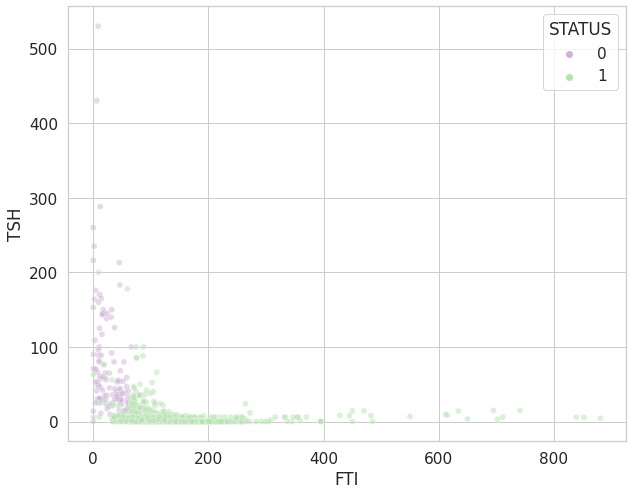

In [ ]:
#FTI
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.scatterplot(x='FTI', y='TSH', hue='STATUS', alpha=0.5, data=hypothyroidism_df, palette='PRGn')


In [ ]:
# Importing the libraries we need
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

**i.) Preparing data for SVM modeling with two features**

In [ ]:
# Standardizing the chosen columns and Splitting the dataset into train and test
X1=hypothyroidism_df[['TSH','FTI']]
scaler= StandardScaler()
scaler.fit_transform(X1)
X1=normalize(X1)
X1_train,X1_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Kernel=Linear**

In [ ]:
# Building a SVC model where kernel = Linear
svm1 = SVC(kernel= 'linear')
svm1.fit(X1_train,y_train)
predsvm1=svm1.predict(X1_test)
accuracysvm1=metrics.accuracy_score(y_test,predsvm1)
print('The accuracy of the model is',str(accuracysvm1 *100),'%')

The accuracy of the model is 98.50498338870432 %


The linear Kernel leads to an a 98.50498338870432 %accuracy of the model

**Kernel=Polynominal**

In [ ]:
# Building a SVC model where kernel = polynomial
svm2 = SVC(kernel='poly',degree=2,gamma='auto')
svm2.fit(X1_train,y_train)
predsvm2=svm1.predict(X1_test)
accuracysvm2=metrics.accuracy_score(y_test,predsvm2)
print('The accuracy of the model is',str(accuracysvm2 *100),'%')

The accuracy of the model is 98.50498338870432 %


Creates a model with 98.50498338870432 % accuracy as well. The change of degree does not affect the accuracy of the model

**Kernel = rbf**

In [ ]:
# Building a Gaussian kernel SVC also known as the rbf model
svm3 = SVC(kernel='rbf',gamma='auto',C=7)
svm3.fit(X1_train,y_train)
predsvm3=svm3.predict(X1_test)
accuracysvm3=metrics.accuracy_score(y_test,predsvm3)
print('The accuracy of the model is',str(accuracysvm3 *100),'%')

The accuracy of the model is 95.1827242524917 %


- The best performing SVM kernel was the linear and polynomial kernel

**ii.) Preparing data for SVM modeling with additional features for the best kernel**

In [ ]:
# Standardizing the chosen columns and Splitting the dataset into train and test
X2=hypothyroidism_df[['TSH','T3','TT4','T4U','FTI']]
scaler= StandardScaler()
scaler.fit_transform(X2)
X2=normalize(X2)
X2_train,X2_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Building a SVC model where kernel = Linear
svm1 = SVC(kernel= 'linear')
svm1.fit(X2_train,y_train)
predsvm1=svm1.predict(X1_test)
accuracysvm1=metrics.accuracy_score(y_test,predsvm1)
print('The accuracy of the model is',str(accuracysvm1 *100),'%')

The accuracy of the model is 98.50498338870432 %


- The performance remains the same for the SVM model with two features and the model with additional features.

### **Conclusion**

### **e.) Different Model Prediction Outputs**

In [ ]:
# Models vs Accuracy_Scores.
Model = ['Random Forest','Gradient Boosted','SVM_Linear','SVM_Polynominal','SVM_rbf']
Accuracy_Scores = [98.67,99.17,98.51,98.51,95.18]

model_results = pd.DataFrame({'Models': Model, 'Accuracy_Scores_%': Accuracy_Scores})
model_results.sort_values(by = 'Accuracy_Scores_%',axis=0,ascending=False)

,Models,Accuracy_Scores_%
1,Gradient Boosted,99.17
0,Random Forest,98.67
2,SVM_Linear,98.51
3,SVM_Polynominal,98.51
4,SVM_rbf,95.18


Gradient boosted decision trees performed the best of all the models above.

## **8.) Challenging The Solution**

### **f.) AdaBoosting**

In [ ]:
# Let's start with ada boosted classifier
# We use decision trees when performing ada boosting 
# We will start by setting different learning rates and comparing the performance of the classifier 
from sklearn.ensemble import AdaBoostClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    ada_clf = AdaBoostClassifier(n_estimators= 300, learning_rate= 1, random_state= 0)
    ada_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", ada_clf.score(X_train, y_train))
    print("Accuracy score (validation):", ada_clf.score(X_test, y_test))
    print("                                                                                    ")
    print("*********************************************************************************")

Learning rate:  0.05
Accuracy score (training): 1.0
Accuracy score (validation): 0.9916943521594684
                                                                                    
*********************************************************************************
Learning rate:  0.075
Accuracy score (training): 1.0
Accuracy score (validation): 0.9916943521594684
                                                                                    
*********************************************************************************
Learning rate:  0.1
Accuracy score (training): 1.0
Accuracy score (validation): 0.9916943521594684
                                                                                    
*********************************************************************************
Learning rate:  0.25
Accuracy score (training): 1.0
Accuracy score (validation): 0.9916943521594684
                                                                                    
**************

- The learning rate is all the same

In [ ]:
# We are going to be using Adaboost to challenge the Gradient boost solution
# Import the necessary package
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators= 300, learning_rate= 1, random_state= 0)

# Fit the model
ada_clf.fit(X_train, y_train)

pred = ada_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracyada = metrics.accuracy_score(y_test,pred)
print('The accuracy of the model is',str(accuracyada *100),'%')

The accuracy of the model is 99.16943521594685 %


- Therefore we can see that the gradient boost performed a little better than the adaboost and hence our gradient boost model performs best and is highly preferrable to the rest of the models.

## **10.) Follow up questions**

- All the questions we had defined have been answered using the availed data. Therefore there is no need of further data to answer the defined questions

**a). Did we have the right data?**

- -Yes we did have the right data to fully come up with models that make the predictions as required.

**b). Do we need other data to answer our question**

- No, we require no additional data as all the questions have been answered and the necessary predictions have been made.

**c). Did we have the right question?**

- Yes we did, the questions defined led to a very thourough yet vigourous exercise of making prediction using various machine learning modelling techniques.The accuracy of each model was measured and accounted for to pick forth the best model.